<a href="https://colab.research.google.com/github/VictorGabrielCuralesvic/Algoritmo-E-Estruturas-de-Dados/blob/main/email_spam_detector_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from nltk.stem.porter import PorterStemmer

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
#Data Cleaning

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
692,ham,"My sister in law, hope you are having a great ...",NaN,NaN,NaN
1323,ham,I thk 50 shd be ok he said plus minus 10.. Did...,NaN,NaN,NaN
3789,ham,I love you !!! You know? Can you feel it? Does...,NaN,NaN,NaN
3909,ham,She.s good. She was wondering if you wont say ...,NaN,NaN,NaN
1641,ham,"Hi , where are you? We're at and they're not ...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
4145,ham,I canåÕt wait for cornwall. Hope tonight isnåÕ...
1764,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...
3764,spam,Someone U know has asked our dating service 2 ...
1799,ham,"If we hit it off, you can move in with me :)"
1768,ham,How. Its a little difficult but its a simple w...


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample(5)

,target,text
5383,ham,Good day to You too.Pray for me.Remove the tee...
1771,ham,Watching tv now. I got new job :)
2315,ham,That's significant but dont worry.
2112,spam,You are a winner you have been specially selec...
3108,ham,Lol I was gonna last month. I cashed some in b...


In [ ]:
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
#EDA

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7d9172600520>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

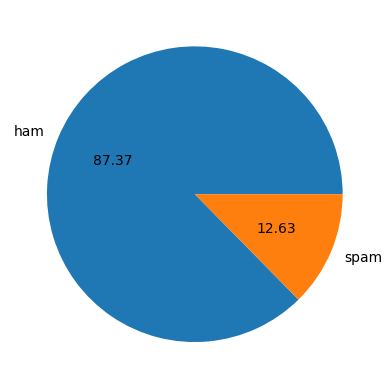

In [ ]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler #fala rapimente sobre
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df[['text']], df['target'])

In [ ]:
df_resampled = pd.DataFrame({'text': X_resampled['text'], 'target': y_resampled})

0    4516
1    4516
Name: target, dtype: int64


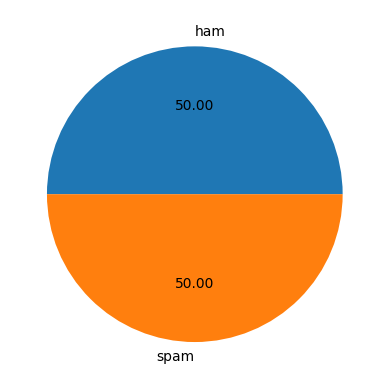

In [ ]:
print(df_resampled['target'].value_counts())
plt.pie(df_resampled['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
import nltk #pra que serve essa lib

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-36-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

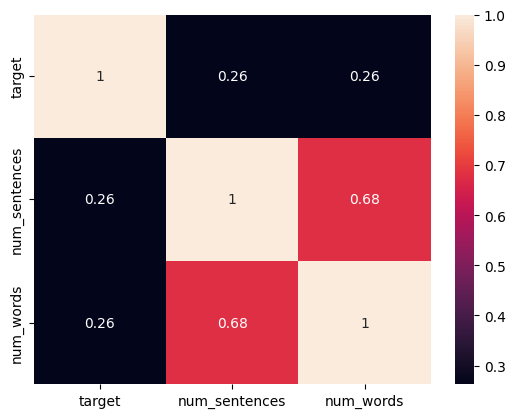

In [ ]:
sns.heatmap(df.corr(),annot=True)

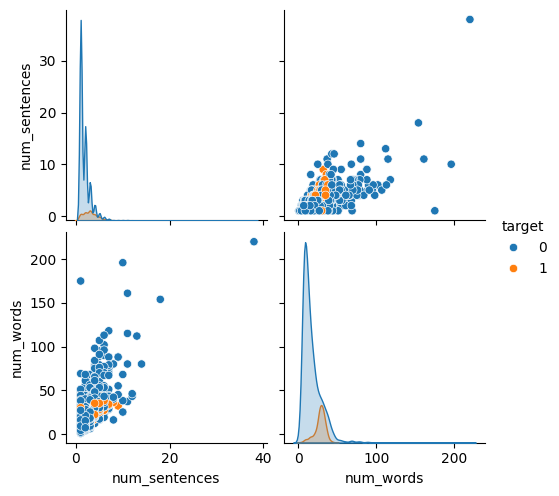

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #falar sobre
from sklearn.model_selection import train_test_split

In [ ]:
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [ ]:
X = df['text']
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [ ]:
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
labels = ['Classe Negativa', 'Classe Positiva']

Accuracy: 0.9845261121856866


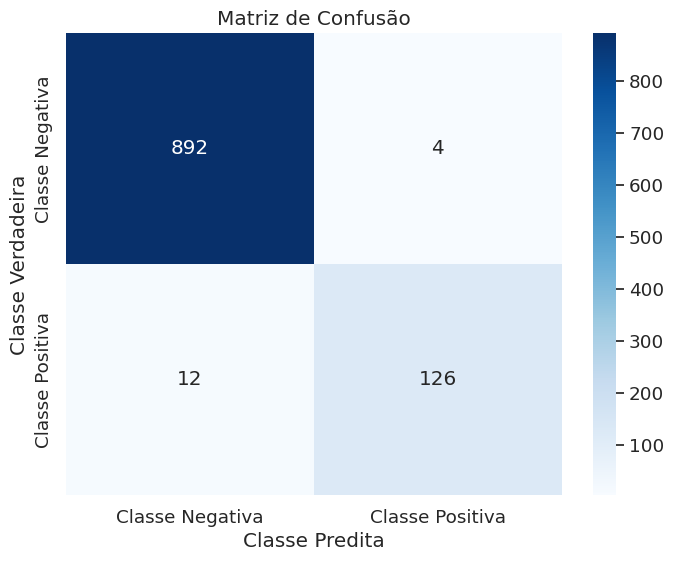


Precision: 0.9692307692307692


In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()
''' print(f'\nConfusion Matrix: {confusion_matrix(y_test, y_pred)}') '''
print(f'\nPrecision: {precision_score(y_test, y_pred)}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=5)

In [ ]:
decision_tree.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred2 = decision_tree.predict(X_test_tfidf)

Accuracy: 0.9410058027079303


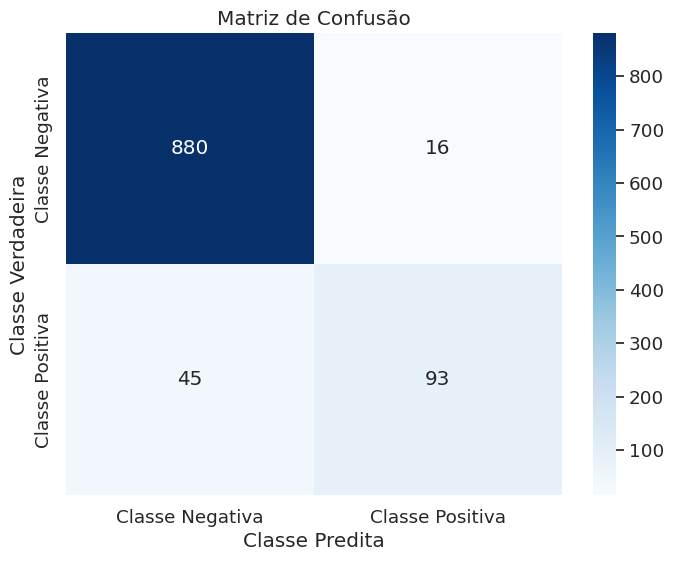


Precision: 0.8532110091743119


In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred2)}')
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()
''' print(f'\nConfusion Matrix: {confusion_matrix(y_test, y_pred2)}') '''
print(f'\nPrecision: {precision_score(y_test, y_pred2)}')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors_c = KNeighborsClassifier()

In [ ]:
neighbors_c.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = neighbors_c.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred3)

In [ ]:
precision = precision_score(y_test, y_pred3)

Accuracy: 0.9129593810444874


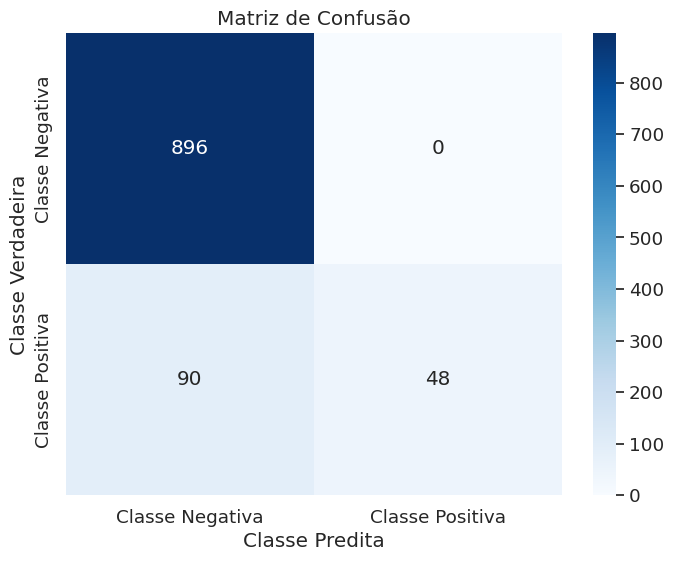


Precision: 1.0


In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred3)}')
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()
''' print(f'\nConfusion Matrix: {confusion_matrix(y_test, y_pred3)}') '''
print(f'\nPrecision: {precision_score(y_test, y_pred3)}')